In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Peksyaji/My_Home/main/Data/Rumah%20Jabodetabek.csv', sep=';')
df.head()

,lokasi,LT,LB,KT,KM,listrik,garasi_carport,harga
0,Kota Depok,165,200,4,2,2200,Ada,2100000000
1,Kota Depok,50,45,2,1,1300,Tidak ada,250000000
2,Kota Depok,50,36,2,1,1300,Ada,250000000
3,Kota Depok,50,45,2,1,1300,Tidak ada,250000000
4,Kota Depok,72,45,2,1,1300,Ada,350000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   lokasi          607 non-null    object
 1   LT              607 non-null    int64 
 2   LB              607 non-null    int64 
 3   KT              607 non-null    int64 
 4   KM              607 non-null    int64 
 5   listrik         607 non-null    int64 
 6   garasi_carport  607 non-null    object
 7   harga           607 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 38.1+ KB


Data telah terbebas dari masalah missing value

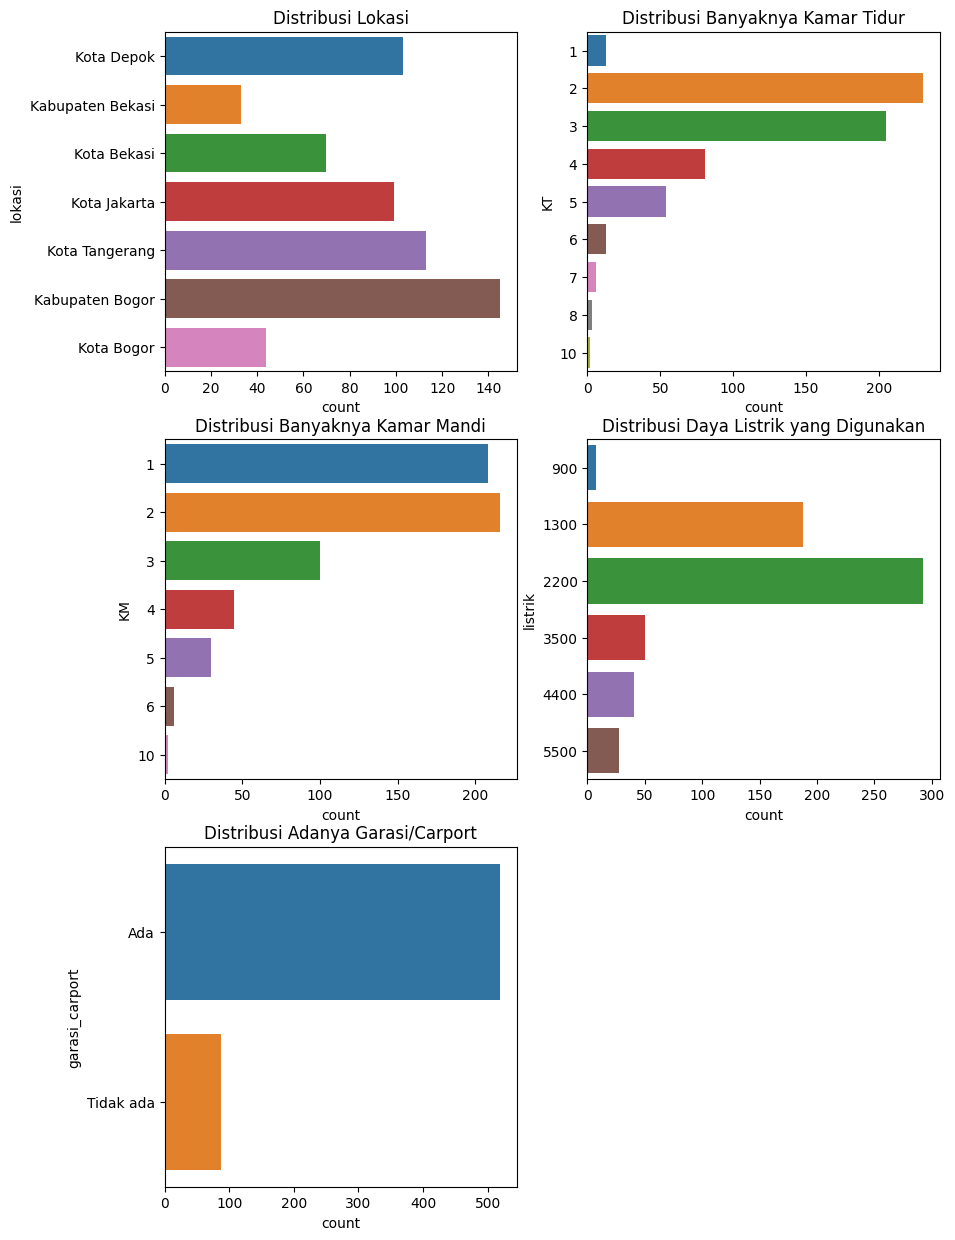

In [4]:
# Membuat bingkai gambar
plt.figure(figsize=(10,15))
# Membuat subplot pertama untuk distribusi lokasi
plt.subplot(3,2,1)
ax1 = sns.countplot(data=df, y='lokasi')
ax1.set_title('Distribusi Lokasi')
# Membuat subplot kedua untuk distribusi kamar tidur
plt.subplot(3,2,2)
ax2 = sns.countplot(data=df, y='KT')
ax2.set_title('Distribusi Banyaknya Kamar Tidur')
# Membuat subplot ketiga untuk distribusi kamar mandi
plt.subplot(3,2,3)
ax3 = sns.countplot(data=df, y='KM')
ax3.set_title('Distribusi Banyaknya Kamar Mandi')
# Membuat subplot keempat untuk distribusi daya listrik
plt.subplot(3,2,4)
ax4 = sns.countplot(data=df, y='listrik')
ax4.set_title('Distribusi Daya Listrik yang Digunakan')
# Membuat subplot kelima untuk distribusi garasi/carport
plt.subplot(3,2,5)
ax5 = sns.countplot(data=df, y='garasi_carport')
ax5.set_title('Distribusi Adanya Garasi/Carport')
plt.show()

1. Data tiap lokasi cukup banyak, hanya di Kab. Bekasi dan Kota Bogor yang datanya di bawah 50 sehingga dikhawatirkan tidak mampu melakukan prediksi yang baik di kedua lokasi tersebut.
2. Jumlah kamar tidur yang banyak dibangun dalam satu rumah adalah 2 atau 3 kamar.
3. Kamar mandi biasanya ada sebanyak 1 atau 2 dalam 1 rumah. Rumah dengan kamar mandi yang lebih dari 2 biasanya rumah dengan luas di atas 60m persegi.
4. Rumah ukuran di bawah 45 meter persegi banyak menggunakan listrik 900 atau 1300 VA. Rumah dengan daya listrik besar biasanya memiliki luas bangunan lebih dari 120 meter persegi.
5. Mayoritas rumah memiliki garasi atau carport. Model prediksi nantinya mungkin akan memiliki error yang lebih besar jika memprediksi rumah tanpa garasi/carport.

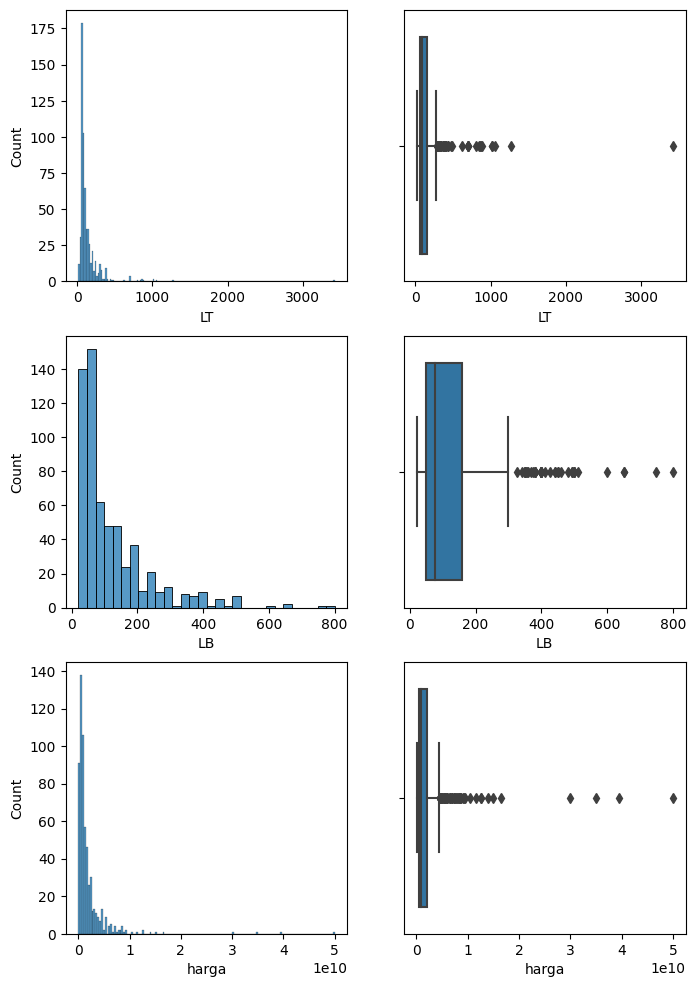

In [5]:
# Membuat bingkai gambar
plt.figure(figsize=(8,12))
# Membuat subplot pertama untuk histplot luas tanah
plt.subplot(3,2,1)
sns.histplot(data=df, x='LT')
# Membuat subplot kedua untuk boxplot luas tanah
plt.subplot(3,2,2)
sns.boxplot(data=df, x='LT')
# Membuat subplot ketiga untuk histplot luas bangunan
plt.subplot(3,2,3)
sns.histplot(data=df, x='LB')
# Membuat subplot keempat untuk boxplot luas bangunan
plt.subplot(3,2,4)
sns.boxplot(data=df, x='LB')
# Membuat subplot kelima untuk histplot harga rumah
plt.subplot(3,2,5)
sns.histplot(data=df, x='harga')
# Membuat subplot keenam untuk boxplot harga rumah
plt.subplot(3,2,6)
sns.boxplot(data=df, x='harga')
plt.show()

Data numerik memiliki cukup banyak outlier yang mengakibatkan sangat berisiko untuk menggunakan model regresi linier biasa. Variabel harga yang menjadi variabel target juga tidak berdistribusi normal sehingga asumsi beberapa model regresi tidak tepenuhi. Oleh karena itu, akan digunakan model regresi yang robust terhadap outlier dan tidak memiliki asumsi variabel target berdistribusi normal.

<ipython-input-6-5281a621a71b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


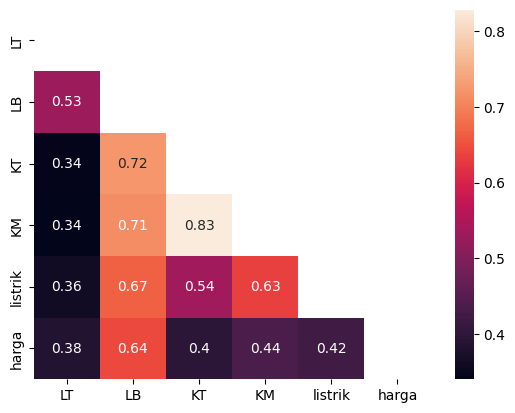

In [6]:
# Mambuat matriks korelasi
corr = df.corr()
# Membuat matriks segitiga atas
mask = np.triu(corr)
# Membuat bingkai plot
plt.figure()
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

Semua variabel numerik memiliki korelasi yang cukup kuat dengan variabel target. Kami juga mengasumsikan bahwa variabel kategorik juga memiliki hubungan linier dengan variabel target. Oleh karena itu, dapat digunakan model regresi yang berasumsi adanya hubungan linier antara variabel bebas dan variabel target.